# Libraries

In [72]:
import polars as pl # Memory? What is that? We borrow.
import pandas as pd # Pandas for some of the libraries that doesn't support polars.
import matplotlib.pyplot as plt # For visualizing.
import math # For the built in math functions.
import seaborn as sns # For visualizing.
import numpy as np # For linear algebra.
import pandas_market_calendars as mcal # For accurate trading days.
from pandas.plotting import autocorrelation_plot # ACF plot.
import time

from scipy import stats # Statistics
from scipy.stats import boxcox # Box-Cox transformation.

# For scoring.
from sklearn.metrics import mean_squared_error

# For ARCH/GARCH models.
from arch.univariate import arch_model

# For seasonal unit root testing.
from pmdarima.arima import OCSBTest, CHTest

# Statsmodels for statistical analysis and forecasting.
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_lm
from statsmodels.datasets import get_rdataset

# Jormund: Personal library.
import jormund.tsa.visualise.base_visualization as jbv # Basic visualization tools for tsa
import jormund.analysis.residual_analysis as ja # Basic visualization tools for residuals
from jormund.tsa.tests.seasonal_trend import hegy_test # Personal hegy test.

from jormund.mpl_config import setup_plots
setup_plots() # To make the graphs look better.

import gc # garbage collection.

# To ignore the annoying warnings.
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Time Series Data:

In [2]:
production_rate = [
    # 1970
    -2.45270031, -0.55152509, -0.35870786, -2.18545486,
    # 1971
    1.90973412,  0.90153584,  0.30801942,  2.29130441,
    # 1972
    4.14957387,  1.89062398,  1.27335290,  3.43689207,
    # 1973
    2.79907636,  0.81768862,  0.86899693,  1.47296187,
    # 1974
    -0.88248358,  0.07427919, -0.41314971, -4.06411893,
    # 1975
    -6.85103912, -1.33129558,  2.42435972,  2.16904208,
    # 1976
    3.02720471,  1.27881101,  1.30386487,  1.77537765,
    # 1977
    2.05516067,  3.05838507,  1.10308888,  0.63346850,
    # 1978
    -0.29339056,  3.94815264,  0.87114701,  1.78447991,
    # 1979
     0.42594327, -0.20491944, -0.29723637,  0.33560928,
    # 1980
     0.41056141, -4.30076832, -1.64181977,  3.78045520,
    # 1981
     0.24627687,  0.30977573,  0.91707444, -2.25457797,
    # 1982
    -2.07131293, -1.24766384, -1.40050430, -1.90375664,
    # 1983
     1.14655720,  2.17942248,  3.36771897,  2.58168445,
    # 1984
     2.89709545,  1.53821324,  0.72128740,  0.04115557,
    # 1985
     0.32353159,  0.07020996, -0.14046924,  0.57978813,
    # 1986
     0.58132135, -0.57641778,  0.37249329,  1.13734778,
    # 1987
     1.30758228,  1.75000563,  1.84366200,  2.40645058,
    # 1988
     0.92013121,  0.87316353,  0.38103668,  0.70292025,
    # 1989
     0.43372685, -0.36675732, -0.62142121,  0.42443392,
    # 1990
     0.68265169,  0.77446547,  0.41944800, -1.57345296,
    # 1991
    -1.91422028,  0.59131506,  1.36255645,  0.21710308,
    # 1992
    -0.13365365,  1.76874773,  0.76167388,  1.05024577,
    # 1993
     0.87901471,  0.21755108,  0.40135891,  1.49618275,
    # 1994
     1.22213656,  1.78250275,  1.26718100,  2.04370404,
    # 1995
     1.02552601,  0.33785685,  0.90043887,  0.87467273,
    # 1996
     0.69285195,  2.11134752,  1.24418680,  1.35396890,
    # 1997
     1.86714700,  1.48763922,  2.28632066,  2.48091341,
    # 1998
     1.10343775,  0.65122238,  0.72551955,  1.44421674,
    # 1999
     1.10341663,  0.98574261,  0.90279881,  1.75533234,
    # 2000
     0.99682019,  1.23293805, -0.10225268, -0.20388383,
    # 2001
    -1.35143911, -1.25954437, -1.44101744, -1.06013675,
    # 2002
     0.70916406,  1.54280957,  0.59478143, -0.05776556,
    # 2003
     0.53922789, -0.69876172,  0.60727351,  1.00599126,
    # 2004
     0.65792806,  0.57461780,  0.56330030,  1.38522763,
    # 2005
     1.39435718,  0.50586367, -0.50305848,  0.93365010,
    # 2006
     0.95057853,  0.59636010,  0.33552773,  0.25603401,
    # 2007
     0.91794957,  1.19594247,  0.22356909,  0.16424632,
    # 2008
    -0.42872571, -1.41297022, -3.26349945, -4.35417741,
    # 2009
    -5.75045075, -3.00372447,  1.39880419,  1.54400617,
    # 2010
     1.88006931,  2.05402479,  1.42683671,  0.37927209,
    # 2011
     0.50174040,  0.21878696,  1.01113866,  0.85151692,
    # 2012
     0.88651817,  0.62923586,  0.07880166,  0.63305509,
    # 2013
     0.67713243,  0.30744961,  0.23440888,  0.79208722,
    # 2014
     0.54709166,  1.33801074,  0.62352731,  0.90355427,
    # 2015
    -0.46710878, -0.69702162,  0.38060610, -0.84554638,
    # 2016 
    -0.41793048, -0.20331883,  0.47491844
]

year_index = np.arange(1970, 2017)
time_index = []

for year in year_index:
    for quarter in range(4):
        month = (quarter + 1) * 3
        time_index.append(f'{year}-{month:02d}-01')  # YYYY-MM-DD format

date = pl.Series(
    "date",
    time_index[:-1], # Until the last element(not included) since data has only 3 quarters in the last year.
    dtype=pl.Date  # or pl.Datetime for timestamps
).str.strptime(pl.Date, "%Y-%m-%d")

us_production_dict = {
    'date': date,
    'production': production_rate,
}

us_production = pl.DataFrame(us_production_dict)

In [161]:
train = us_production[:-8]
test = us_production[-8:]

# Functions:

In [27]:
def test_unit_roots(data, series='production', trend=False, constant=False, lags=20, all=True, period=4, return_results=False):
    jbv.plot_rolling_statistics(data, series)    
    jbv.acf_pacf_plots(data, series, all=all)
    jbv.acf_pacf_plots(data, series, lags=lags)
    decomposed_data = jbv.seasonal_decompose_plot(data, series, period=4)
    
    adf_results = adf_testing(data, series)
    kpss_results = kpss_testing(data, series)
    seasonal_unit_root(data, series, period, trend, constant)
    if return_results:
        return decomposed_data, adf_results, kpss_results

In [5]:
def kpss_testing(data, series):
    kpss_results = {}
    for r in ["c", "ct"]:
        kpss_result = kpss(data[series], regression='c', nlags="auto")
        kpss_results[r] = kpss_result
        
        print(f'KPSS Test: {r}')
        print(f'KPSS Statistic: {kpss_result[0]}')
        print(f'p-value: {kpss_result[1]} \n')
    return kpss_results

In [6]:
def adf_testing(data, series):
    adf_results = {}
    for r in ["c", "ct"]:
        adf_result = adfuller(data[series], regression=r, autolag='BIC')
        adf_results[r] = adf_results
        
        print(f'Augmented Dickey-Fuller Test: {r}')
        print(f'ADF Statistic: {adf_result[0]}')
        print(f'p-value: {adf_result[1]} \n')
    return adf_results

In [33]:
def seasonal_unit_root(data, series, period, trend, constant):
    n_ocsb = OCSBTest(m=period).estimate_seasonal_differencing_term(data[series])
    n_ch = CHTest(m=period).estimate_seasonal_differencing_term(data[series])
    
    n_seasdiffs = {"recommended order of seasonal differencing":"", "   OCSB recommendation":n_ocsb, "    nCH recommendation":n_ch}
    [print(key, ":", value) for key,value in n_seasdiffs.items()]

    print(hegy_test(data[series], period, trend, constant))

In [44]:
def model_summary(data, order, seasonal_order, trend):
    t1 = time.time()
    model = ARIMA(endog=data, order=order, seasonal_order=seasonal_order, trend=trend)
    results = model.fit()
    print(results.summary())
    t2 = time.time()
    print('Elapsed time [m]: ', np.round((t2-t1)/60,4))
    gc.collect()

# Visualization:

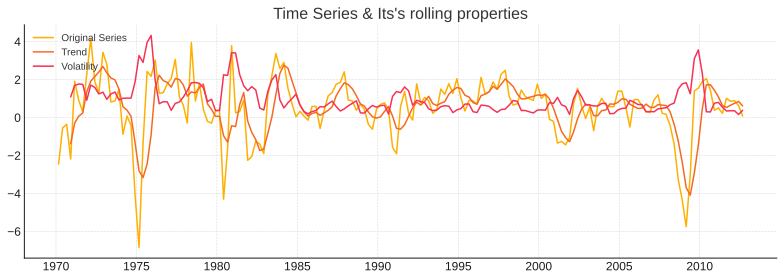

In [9]:
jbv.plot_rolling_statistics(train, 'production')

## Interpretation:
- Seems to have some seasonality.
- Data is either stationary or have a non-constant trend.
- There might be heteroscadasticity.

## White noise band:
Using:

$2 \times \frac{1}{\sqrt{n}}$,

where n is the length of the data. Therefore white noise band: **~**${0.146}$.

# Stationarity Analysis:

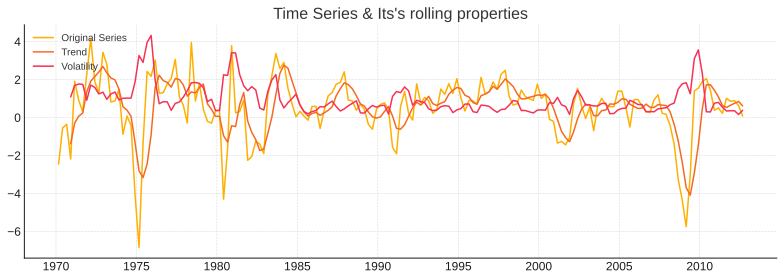

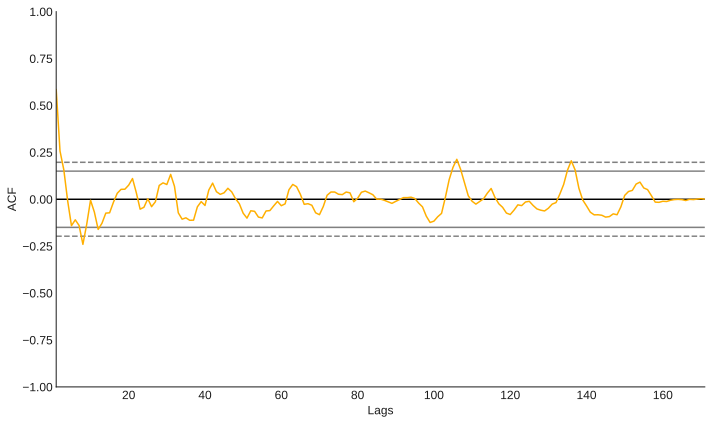

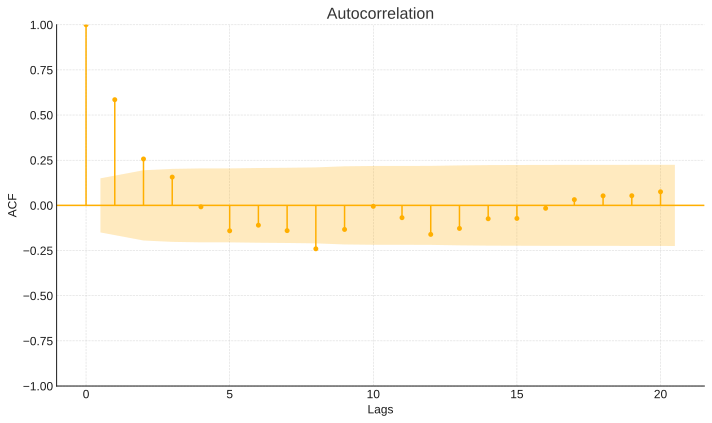

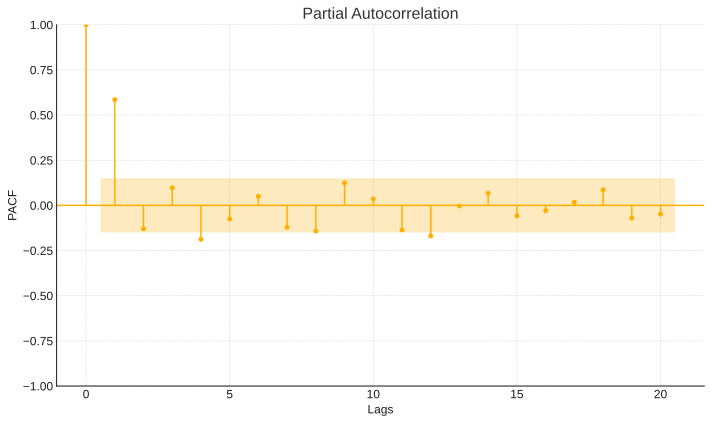

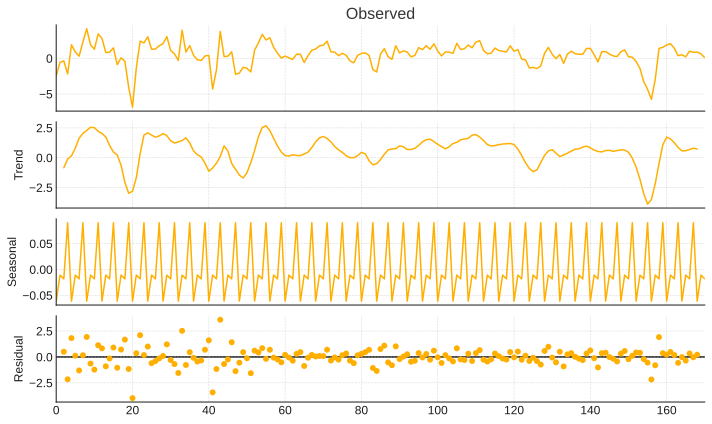

Augmented Dickey-Fuller Test: c
ADF Statistic: -6.731792407567151
p-value: 3.2818692666255045e-09 

Augmented Dickey-Fuller Test: ct
ADF Statistic: -6.764746433386652
p-value: 4.778472137346046e-08 

KPSS Test: c
KPSS Statistic: 0.08338481871175904
p-value: 0.1 

KPSS Test: ct
KPSS Statistic: 0.08338481871175904
p-value: 0.1 

recommended order of seasonal differencing : 
   OCSB recommendation : 0
    nCH recommendation : 0
{'stat_t': [-5.3708795758942385, 9.337368713609372], 'p_values_t': [2.66318665778536e-07, 7.146408255015345e-17], 'stat_f': [56.08973234227387, 111.7568927211792, 90.28536113837873], 'p_values_f': [2.9146338808515936e-19, 2.3720755432292222e-39, 2.601891449893965e-40]}


In [34]:
test_unit_roots(train, lags=20, all="True")

## Interpretation:

Every tests and graphs are saying:

- The data doesn't have a trend.
- The data doesn't have a seasonal trend.

Therefore the data can be used for statistical modeling as is. This was expected since the data is about the change in the production rate in U.S.

# Model Selection:

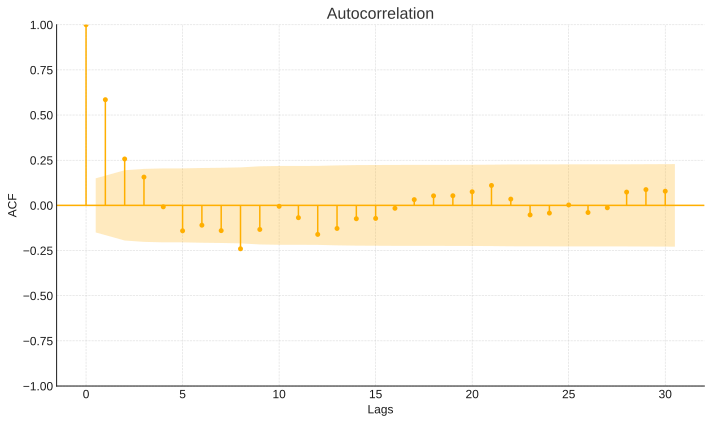

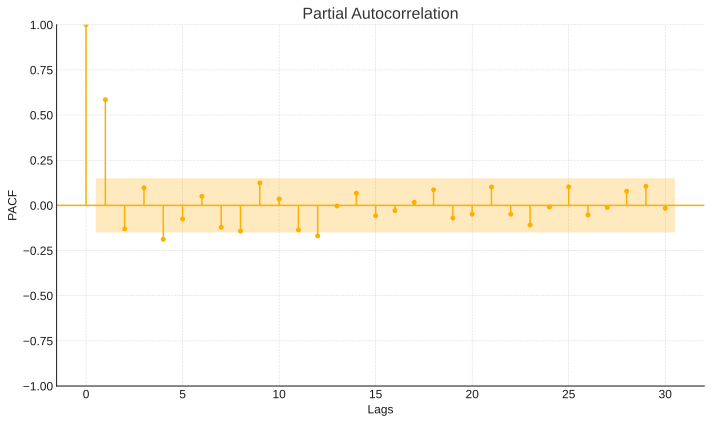

In [35]:
jbv.acf_pacf_plots(train, 'production', lags=30)

## Possible models:

- AR parameter: 1
- I parameter: 0
- MA parameter: {1, 3}
- SAR parameter: 0
- SI parameter: 0
- SMA parameter: 0

In [162]:
train_model_selection = train.to_pandas().set_index('date')

In [39]:
model_summary(train_model_selection['production'], (1,0,1), (0,0,0,4), trend=None)

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  171
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.700
Date:                Fri, 27 Dec 2024   AIC                            575.399
Time:                        13:16:24   BIC                            587.966
Sample:                    03-01-1970   HQIC                           580.498
                         - 09-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5106      0.226      2.262      0.024       0.068       0.953
ar.L1          0.3700      0.081      4.567      0.000       0.211       0.529
ma.L1          0.3454      0.090      3.835      0.0

In [40]:
model_summary(train_model_selection['production'], (1,0,3), (0,0,0,4), trend=None)

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  171
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -282.870
Date:                Fri, 27 Dec 2024   AIC                            577.740
Time:                        13:16:51   BIC                            596.590
Sample:                    03-01-1970   HQIC                           585.388
                         - 09-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5084      0.259      1.963      0.050       0.001       1.016
ar.L1          0.4208      0.353      1.192      0.233      -0.271       1.113
ma.L1          0.2678      0.358      0.749      0.4

## Selected model:

From the IC scores and the how well the model fits from the Ljing-Box and Jarque-Bera tests, the best model is:
    $$\text{SARIMA}(1,0,1)*(0,0,0)_4$$

# Diagnostics Checking:

In [67]:
arima_model = ARIMA(endog=train_model_selection['production'],
                order=(1,0,1), seasonal_order=(0,0,0,4), trend=None)
arima_model_fit = arima_model.fit()
residuals = pd.DataFrame(arima_model_fit.resid)

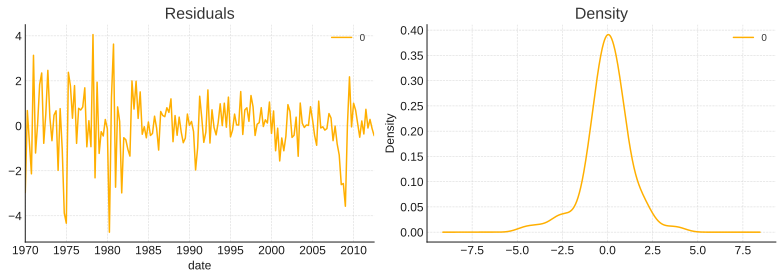

In [52]:
ja.basic_residual_plot_sm(residuals)

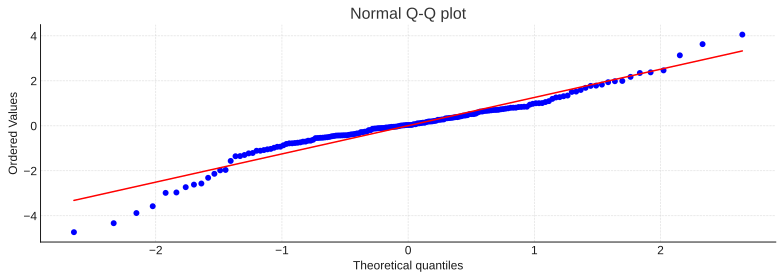

In [58]:
ja.basic_normal_qq_plot_sm(residuals[0])

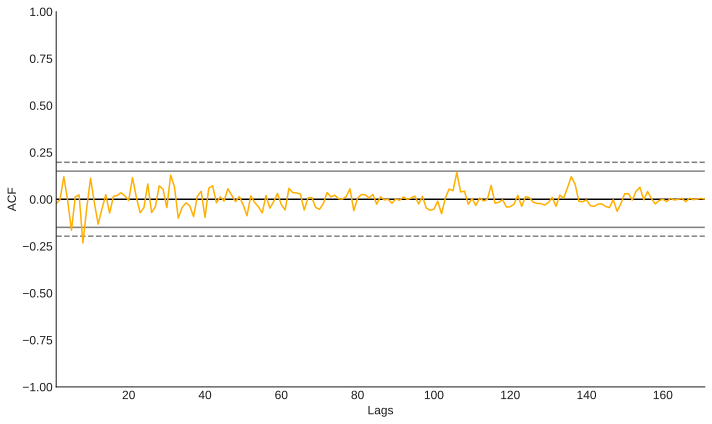

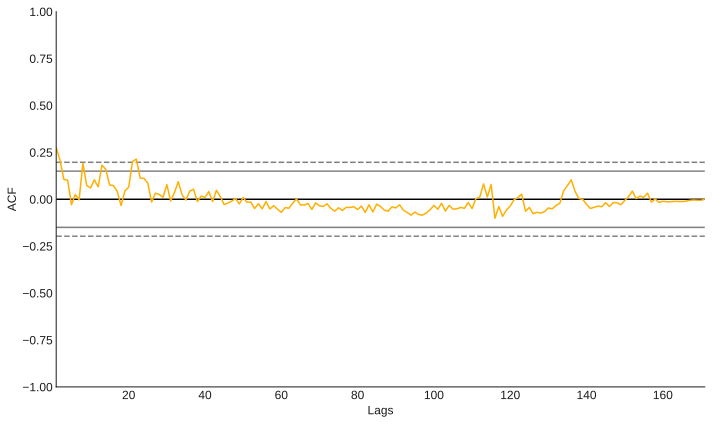

In [63]:
for i in [residuals, (residuals**2)]:
    jbv.acf_pacf_plots(i, 0, all=True)

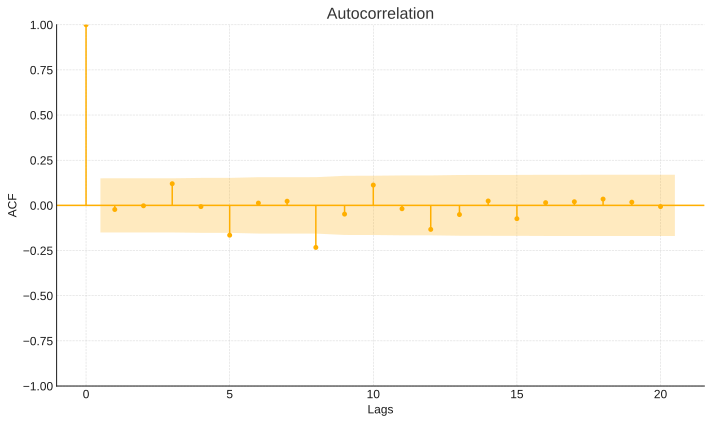

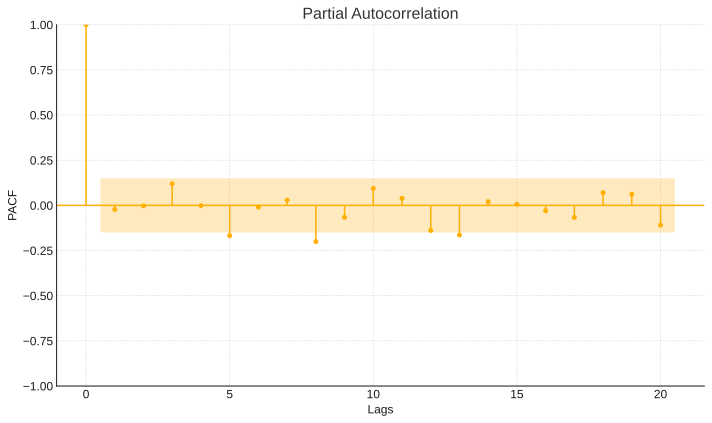

In [91]:
jbv.acf_pacf_plots(residuals, 0, lags=20)

In [68]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  171
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.700
Date:                Fri, 27 Dec 2024   AIC                            575.399
Time:                        13:45:17   BIC                            587.966
Sample:                    03-01-1970   HQIC                           580.498
                         - 09-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5106      0.226      2.262      0.024       0.068       0.953
ar.L1          0.3700      0.081      4.567      0.000       0.211       0.529
ma.L1          0.3454      0.090      3.835      0.000       0.169       0.522
sigma2         1.6116      0.127     12.710      0.000       1.363       1.860
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                49.36
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
lm_result = acorr_lm(residuals, period=5)

print('Lagrange Multiplier Test:')
print(f'LM Statistic: {lm_result[0]}')
print(f'p-value: {lm_result[1]} \n')

Lagrange Multiplier Test:
LM Statistic: 14.314283405426536
p-value: 0.15913276023466402 



In [66]:
arch_test = het_arch(residuals)
print('ARCH Test:')
print(f'LM Statistic: {arch_test[0]},\np-value: {arch_test[1]}')

ARCH Test:
LM Statistic: 25.61190427526588,
p-value: 0.0042987510736380305


## Interpretation:

- Autocorrelation: From the Ljung-Box statistic, Lagrange Multiplier test, ACF and PACF the residuals doesn't seem have autocorrelation. Residuals act like white noise.
- Distribution: From the Q-Q plot, histogram and the Jarque-Bera statistic it is clear that the residuals are not normally distributed. They have heavy tails. Shows skewed t distribution behaviour.
- Heteroscedasticity: From the line graph and the ARCH Engle's test we can say that the data has heteroscedasticity. Therefore we will be using ARCH/GARCH models.

# Conditional Heteroscadasticity Modelling:

## GARCH model:

In [100]:
garch_model = arch_model(train_model_selection['production'], mean='LS', p=1, o=0, q=0, dist='skewstudent')
garch_model_fit = garch_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     30,   Neg. LLF: 538.5187915557353
Iteration:      8,   Func. Count:     55,   Neg. LLF: 278.91513618564375
Iteration:     12,   Func. Count:     78,   Neg. LLF: 278.9042810489543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 278.90428104893334
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12


In [101]:
garch_model_fit

                            Least Squares - ARCH Model Results                           
Dep. Variable:                        production   R-squared:                       0.000
Mean Model:                        Least Squares   Adj. R-squared:                  0.000
Vol Model:                                  ARCH   Log-Likelihood:               -278.904
Distribution:      Standardized Skew Student's t   AIC:                           567.809
Method:                       Maximum Likelihood   BIC:                           583.517
                                                   No. Observations:                  171
Date:                           Fri, Dec 27 2024   Df Residuals:                      170
Time:                                   14:31:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

## GJR-GARCH model:

In [110]:
gjr_model = arch_model(train_model_selection['production'], mean='LS', p=0, o=1, q=0, dist='skewstudent')
gjr_model_fit = gjr_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 2147.7079807585
Iteration:      8,   Func. Count:     58,   Neg. LLF: 324.9510775533698
Iteration:     12,   Func. Count:     84,   Neg. LLF: 275.53015511107697
Iteration:     16,   Func. Count:    108,   Neg. LLF: 275.5300347561591
Optimization terminated successfully    (Exit mode 0)
            Current function value: 275.5300347561591
            Iterations: 17
            Function evaluations: 113
            Gradient evaluations: 17


In [111]:
gjr_model_fit

                         Least Squares - GJR-GARCH Model Results                         
Dep. Variable:                        production   R-squared:                       0.000
Mean Model:                        Least Squares   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -275.530
Distribution:      Standardized Skew Student's t   AIC:                           561.060
Method:                       Maximum Likelihood   BIC:                           576.768
                                                   No. Observations:                  171
Date:                           Fri, Dec 27 2024   Df Residuals:                      170
Time:                                   14:33:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

# Forecasting:

### ARIMA:

In [163]:
arima_model = ARIMA(endog=train_model_selection['production'],
                order=(1,0,1), seasonal_order=(0,0,0,4), trend=None)
arima_model_fit = arima_model.fit()

In [164]:
arima_output = arima_model_fit.get_forecast(steps=len(test))
arima_output = arima_output.summary_frame()
arima_predictions = arima_output['mean']

### GARCH:

In [165]:
garch_model = arch_model(train_model_selection['production'], mean='LS', p=1, o=0, q=0, dist='skewstudent')
garch_model_fit = garch_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     30,   Neg. LLF: 546.6380870784078
Iteration:      8,   Func. Count:     55,   Neg. LLF: 284.8684391964649
Iteration:     12,   Func. Count:     78,   Neg. LLF: 284.8585691706545
Optimization terminated successfully    (Exit mode 0)
            Current function value: 284.85856917064507
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12


In [166]:
garch_output = garch_model_fit.forecast(horizon=len(test))
garch_predictions = garch_output.mean.values[0]

### GJR-GARCH:

In [167]:
gjr_model = arch_model(train_model_selection['production'], mean='LS', p=0, o=1, q=0, dist='skewstudent')
gjr_model_fit = gjr_model.fit(update_freq=4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 368.329884273257
Iteration:      8,   Func. Count:     58,   Neg. LLF: 286.08643787652784
Iteration:     12,   Func. Count:     83,   Neg. LLF: 282.247907254003
Iteration:     16,   Func. Count:    107,   Neg. LLF: 282.243848637747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 282.243848637747
            Iterations: 17
            Function evaluations: 112
            Gradient evaluations: 17


In [168]:
gjr_output = gjr_model_fit.forecast(horizon=len(test))
gjr_predictions = gjr_output.mean.values[0]

## Plot forecasts:

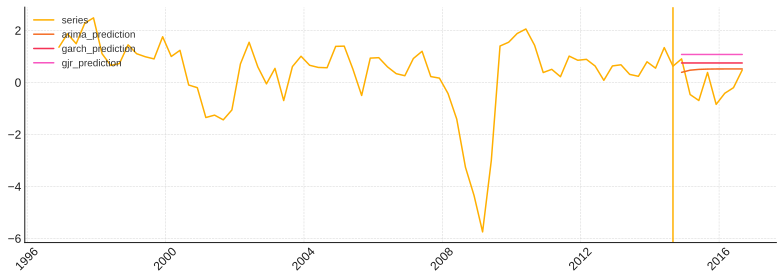

In [169]:
plt.figure(figsize=(11,4))
plt.plot(us_production['date'][-80:], us_production['production'][-80:], label='series')
plt.plot(arima_predictions.index, arima_predictions, label='arima_prediction')
plt.plot(arima_predictions.index, garch_predictions, label='garch_prediction')
plt.plot(arima_predictions.index, gjr_predictions, label='gjr_prediction')
plt.axvline(train['date'][-1])
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()